In [1]:
import numpy as np

from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [2]:
def ExpFit_Gp(xs, ys, Gp):
    """
        Objective: fit select points (xs, ys) into exponential trend ( y = e^(b(x - Gp)) + d )

        Input: 
        1. xs: list of x-value of selected points
        2. ys: list of y-value of selected points
        3. Gp: cumulative gas production in mmscf unit

        Return: CGRi (e^d) as first variable, mCGR (b) as second variable
    """
    clean_xs = [xs[i] for i in range(len(xs)) if ys[i] > 0]
    clean_ys = [ys[i] for i in range(len(ys)) if ys[i] > 0]

    p = np.polyfit(clean_xs, np.log(clean_ys), 1)
    b, log_a = p
    d = log_a + b * Gp
    
    def func(x, b, d):
        return np.exp(b * (x - Gp) + d)

    res, _ = curve_fit(func, xs, ys, p0=[b,d])
    cf_b, cf_d = res

    return np.exp(cf_d), cf_b

In [3]:
#Sanity Test
xs = np.linspace(2, 5, 10)
a = 100
b = -3
ys = a*np.exp(b*xs) + np.random.randn(10)*1e-4

a = 99.64819837953539
b = -2.998676016991109


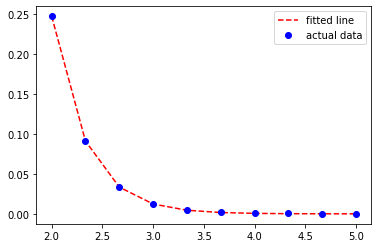

In [4]:
a, b = ExpFit_Gp(xs, ys, 0)
print('a = ' + str(a))
print('b = ' + str(b))

plt.plot(xs, a * np.exp(b * xs), 'r--', label = 'fitted line')
plt.plot(xs, ys, 'bo', label = 'actual data')
plt.legend()

In [5]:
##Test Case 7
xs = [16252.1352620242, 16253.8828363968, 16255.6363066906, 16257.3714131312]
ys = [18.2696907349998, 19.1176855152631, 18.7541902476911, 21.0299499007001]
Gp = 16.3179645947676 * 1000

cgri, mcgr = ExpFit_Gp(xs, ys, Gp)
print('cgri = ' + str(cgri))
print('mcgr = ' + str(mcgr))

cgri = 86.88926725576329
mcgr = 0.023825975168708304


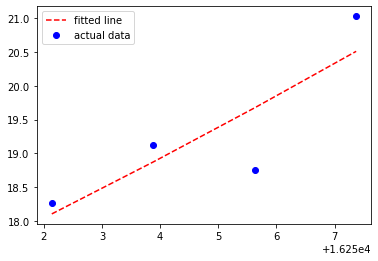

In [6]:
ys_fit = np.exp([mcgr * (i - Gp) + np.log(cgri) for i in xs])
plt.plot(xs, ys_fit, 'r--', label = 'fitted line')
plt.plot(xs, ys, 'bo', label = 'actual data')
plt.legend()
plt.show()